In [59]:
import pandas as pd
import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def recodeEMIRT(vote):
    if vote == 1:
        return 1
    if vote == 2:
        return -1
    return 0


def recodeWNOM(vote):
    if vote == 0:
        return 9
    if vote == 1:
        return 1
    if vote == 2:
        return 6
    return 9
matrix6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','wnominate_ep6_votes.csv'))
matrix7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','matrix_ep7_votes.csv'))
matrix8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','matrix_ep8_votes.csv'))
matrix9 = pd.read_csv(os.path.join('Cleaned_data','EP9_clean_data','matrix_ep9_votes.csv'))

matrix6EMIRT = matrix6.copy()
matrix6WNOMINATE = matrix6.copy()
matrix6EMIRT = matrix6EMIRT.map(recodeEMIRT)
matrix6WNOMINATE = matrix6WNOMINATE.map(recodeWNOM)
pca = PCA(n_components=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
basepca6 = pca.fit_transform(matrix6)
emIRTpca6 = pca.fit_transform(matrix6EMIRT)
WNOMINATEpca6 = pca.fit_transform(matrix6WNOMINATE)
basepca6std = scaler.fit_transform(basepca6)
emIRTpca6std = pd.DataFrame()
emIRTpca6std['coord1D'] = pd.DataFrame(scaler.fit_transform(emIRTpca6)*-1)
WNOMINATEpca6std = scaler.fit_transform(WNOMINATEpca6)


In [60]:
matrix7EMIRT = matrix7.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix7EMIRT =  matrix7EMIRT.map(recodeEMIRT)

emIRTpca7 = pca.fit_transform(matrix7EMIRT)
emIRTpca7std = pd.DataFrame()
emIRTpca7std['coord1D'] = pd.DataFrame(scaler.fit_transform(emIRTpca7)*-1)

In [61]:
matrix8EMIRT = matrix8.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix8EMIRT =  matrix8EMIRT.map(recodeEMIRT)

emIRTpca8 = pca.fit_transform(matrix8EMIRT)
emIRTpca8std = pd.DataFrame()
emIRTpca8std['coord1D'] = pd.DataFrame(scaler.fit_transform(emIRTpca8)*-1)

In [62]:
matrix9EMIRT = matrix9.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix9EMIRT =  matrix9EMIRT.map(recodeEMIRT)

emIRTpca9 = pca.fit_transform(matrix9EMIRT)
emIRTpca9std = pd.DataFrame()
emIRTpca9std['coord1D'] = pd.DataFrame(scaler.fit_transform(emIRTpca9)*-1)

In [63]:
def extract_iters(ep):
    file_pattern = f'Results/EP{ep}/EP{ep}_Ideal_points_emIRT_Iteration*.csv'

    # Use glob to list all files matching the pattern
    file_list = glob.glob(file_pattern)

    # Initialize an empty list to hold the DataFrames
    df_list = []

    for file in file_list:
        df = pd.read_csv(file)
        column = df[f'EPG....EPG{ep}']
        names = df[f'MepId....names{ep}']
        df = df['d1']

        df_list.append(df)

    combined_df = pd.concat(df_list, axis=0)

    # Calculate the average across the DataFrames
    average_df = combined_df.groupby(combined_df.index).mean()
    column = column.reset_index(drop=True)
    names = names.reset_index(drop=True)
    average_df = average_df.reset_index(drop=True)

    final_df = pd.concat([names, column, average_df], axis=1)

    final_df.columns = ['MepId', 'EPG', 'Average_position']
    return final_df


avg6 = extract_iters(6)
avg7 = extract_iters(7)
avg8 = extract_iters(8)
avg9 = extract_iters(9)

In [64]:


avg8_scaled = avg8.copy()
avg8_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg8['Average_position']))
avg6_scaled = avg6.copy()
avg6_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg6['Average_position']))
avg7_scaled = avg7.copy()
avg7_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(avg7['Average_position']))
avg9_scaled = avg9.copy()
avg9_scaled['coord1D']= scaler.fit_transform(pd.DataFrame(avg9['Average_position']))

In [65]:
wnomstarts6 = pd.read_csv(os.path.join('Results','EP6','startsWNOM6.csv'))
wnomstarts6_scaled = wnomstarts6.copy()
wnomstarts6_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(wnomstarts6['x']))

In [66]:
wnomstarts7 = pd.read_csv(os.path.join('Results','EP7','startsWNOM7.csv'))
wnomstarts7_scaled = wnomstarts7.copy()
wnomstarts7_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(wnomstarts7['x']))

In [67]:
wnomstarts8 = pd.read_csv(os.path.join('Results','EP8','startsWNOM8.csv'))
wnomstarts8_scaled = wnomstarts8.copy()
wnomstarts8_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(wnomstarts8['x']))

In [68]:
wnomstarts9 = pd.read_csv(os.path.join('Results','EP9','startsWNOM9.csv'))
wnomstarts9_scaled = wnomstarts9.copy()
wnomstarts9_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(wnomstarts9['x']))

In [69]:
import scipy.stats as stats


In [70]:
def startspcascatter (pca,starts,number):
        
    df = starts.join(pca,rsuffix="y",lsuffix="x")
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x="coord1Dx", y="coord1Dy", s=100)
    corr_coef, p_value = stats.pearsonr(np.array(df["coord1Dx"]), np.array(df["coord1Dy"]))
    print("Correlation Coefficient:", corr_coef)
    print("P-value:", p_value)
    plt.xlabel("W-NOMINATE starts",fontsize = 20)
    plt.ylabel("PCA",fontsize = 20)
    plt.text(
    0.05, 0.95,  
    f"Pearson coefficient = {corr_coef:.3f}",
    ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
        
    )
    plt.savefig(os.path.join("Graphs", f"Scatterstartspca{number}.png"), dpi=300)

    # Show plot
    plt.show()

In [71]:
def startsresultscatter (eigen,starts,number):
        
    df = starts.join(eigen,rsuffix="y",lsuffix="x")
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x="coord1Dx", y="coord1Dy", s=100)
    corr_coef, p_value = stats.pearsonr(np.array(df["coord1Dx"]), np.array(df["coord1Dy"]))
    print("Correlation Coefficient:", corr_coef)
    print("P-value:", p_value)
    plt.xlabel("W-NOMINATE starts ",fontsize = 20)
    plt.ylabel("emIRT results with W-NOMINATE starts",fontsize = 20)
    plt.text(
    0.05, 0.95,  
    f"Pearson coefficient = {corr_coef:.3f}",
    ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
        
    )
    plt.savefig(os.path.join("Graphs", f"Scatterstartsresult{number}.png"), dpi=300)

    # Show plot
    plt.show()

In [77]:
def startswnomscatter (wnom,starts,number):
        
    df = starts.join(wnom,rsuffix="y",lsuffix="x")
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x="coord1Dx", y="coord1Dy", s=100)
    corr_coef, p_value = stats.pearsonr(np.array(df["coord1Dx"]), np.array(df["coord1Dy"]))
    print("Correlation Coefficient:", corr_coef)
    print("P-value:", p_value)
    plt.xlabel("W-NOMINATE starts ",fontsize = 20)
    plt.ylabel("W-NOMINATE",fontsize = 20)
    plt.text(
    0.05, 0.95,  
    f"Pearson coefficient = {corr_coef:.3f}",
    ha='left', va='top', transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.5)
        
    )
    plt.savefig(os.path.join("Graphs", f"Scatterstartswnom{number}.png"), dpi=300)

    # Show plot
    plt.show()

In [72]:
emIRT8_eigenstarts = pd.read_csv(os.path.join('Results', 'EP8', 'emIRT_EP8_eigenstarts.csv'))
emIRT8_eigenstarts_scaled = emIRT8_eigenstarts.copy()
emIRT8_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT8_eigenstarts['d1']))
emIRT8_eigenstarts_scaled['EPG'] = emIRT8_eigenstarts_scaled['EPG....EPG8']
emIRT8_eigenstarts_scaled['EPG'] = emIRT8_eigenstarts_scaled['EPG'].fillna(0)
emIRT7_eigenstarts = pd.read_csv(os.path.join('Results', 'EP7', 'emIRT_EP7_eigenstarts.csv'))
emIRT7_eigenstarts_scaled = emIRT7_eigenstarts.copy()
emIRT7_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT7_eigenstarts['d1']))
emIRT7_eigenstarts_scaled['EPG'] = emIRT7_eigenstarts_scaled['EPG....EPG7']

emIRT6_eigenstarts = pd.read_csv(os.path.join('Results', 'EP6', 'emIRT_EP6_eigenstartsXDATA1.csv'))
emIRT6_eigenstarts_scaled = emIRT6_eigenstarts.copy()
emIRT6_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT6_eigenstarts['d1']))
emIRT6_eigenstarts_scaled['EPG'] = emIRT6_eigenstarts_scaled['EPG....EPG6']

emIRT9_eigenstarts = pd.read_csv(os.path.join('Results', 'EP9', 'emIRT_EP9_eigenstarts.csv'))
emIRT9_eigenstarts_scaled = emIRT9_eigenstarts.copy()
emIRT9_eigenstarts_scaled['coord1D'] = scaler.fit_transform(pd.DataFrame(emIRT9_eigenstarts['d1']))
emIRT9_eigenstarts_scaled['EPG'] = emIRT9_eigenstarts_scaled['EPG....EPG9']

In [75]:
wnominate6_1d = pd.read_csv(os.path.join('Results','EP6','wnominate61d.csv'))
wnominate7_1d = pd.read_csv(os.path.join('Results','EP7','wnominate71d.csv'))
wnominate8_1d = pd.read_csv(os.path.join('Results','EP8','wnominate81d.csv'))

In [ ]:
startspcascatter(emIRTpca6std,wnomstarts6_scaled,6)
startspcascatter(emIRTpca7std,wnomstarts7_scaled,7)
startspcascatter(emIRTpca8std,wnomstarts8_scaled,8)
startspcascatter(emIRTpca9std,wnomstarts9_scaled,9)

Correlation Coefficient: -0.9437512311300316
P-value: 0.0


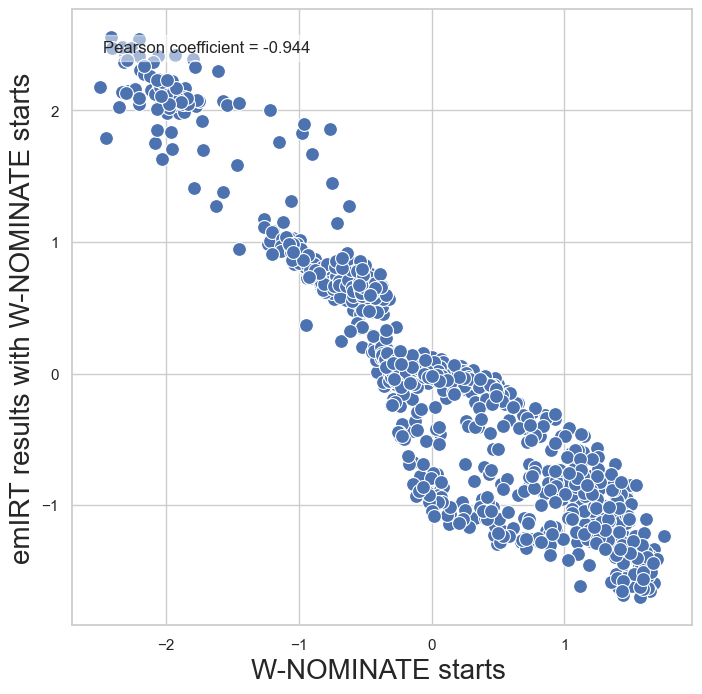

Correlation Coefficient: 0.7916233698409063
P-value: 2.915808802057799e-184


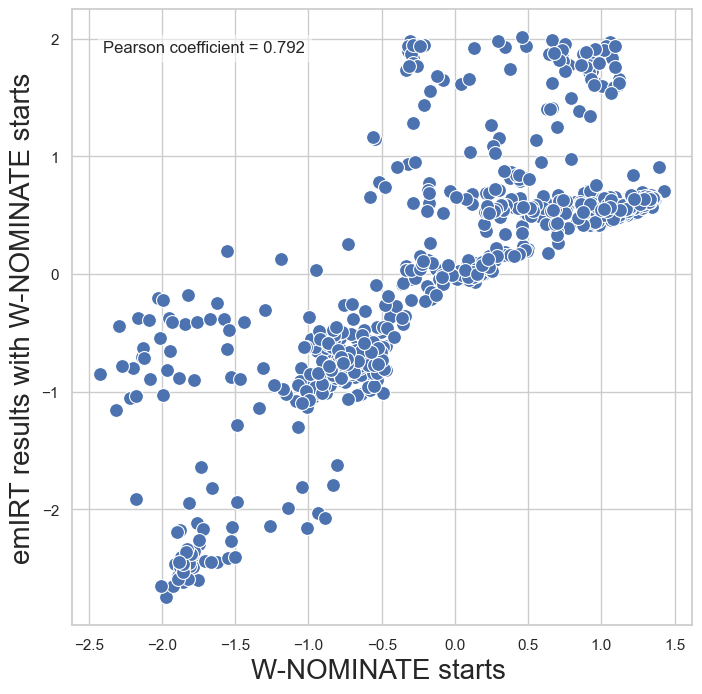

Correlation Coefficient: 0.8521054233357757
P-value: 6.388159266999753e-243


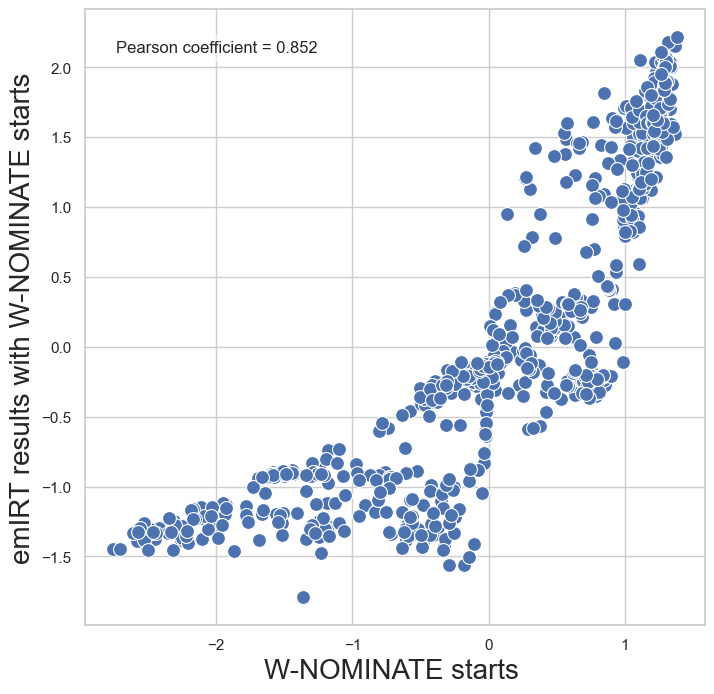

Correlation Coefficient: -0.6562215507301623
P-value: 8.859003091021564e-108


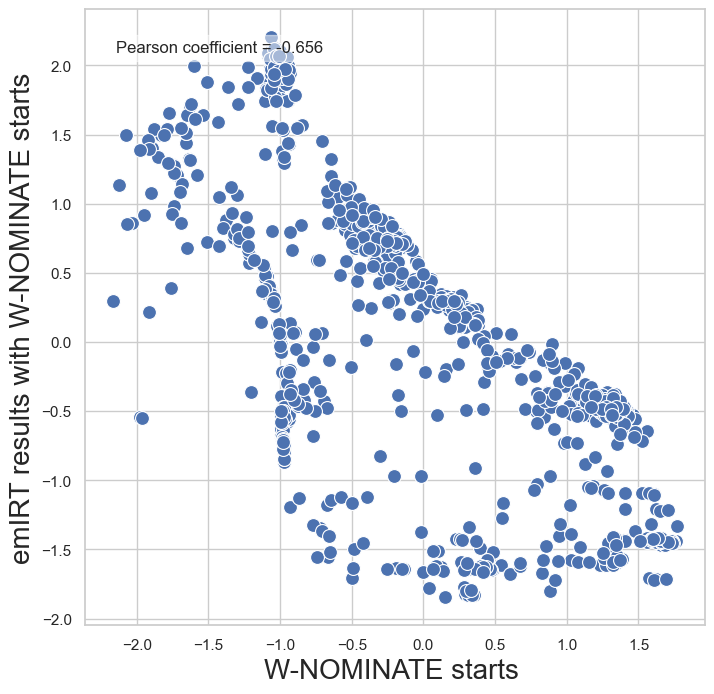

In [74]:
startsresultscatter(emIRT6_eigenstarts_scaled,wnomstarts6_scaled,6)
startsresultscatter(emIRT7_eigenstarts_scaled,wnomstarts7_scaled,7)
startsresultscatter(emIRT8_eigenstarts_scaled,wnomstarts8_scaled,8)
startsresultscatter(emIRT9_eigenstarts_scaled,wnomstarts9_scaled,9)

Correlation Coefficient: nan
P-value: nan


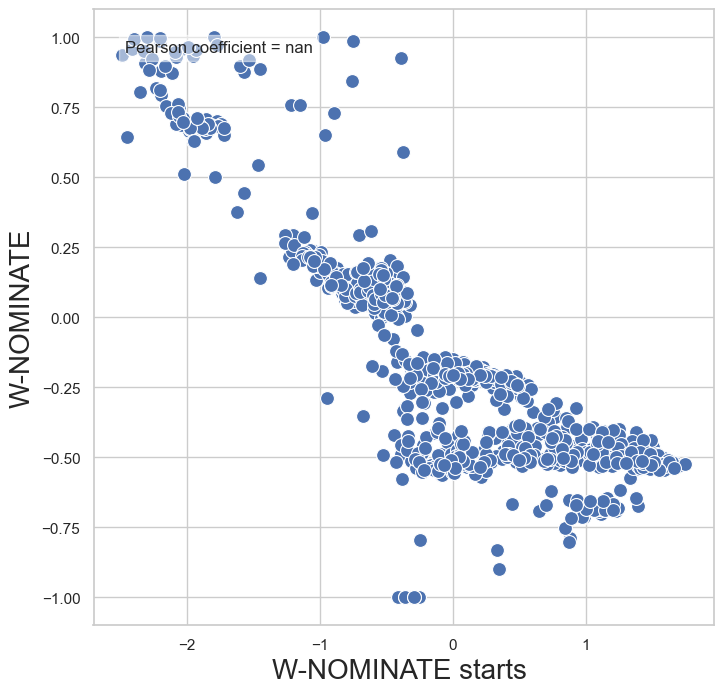

Correlation Coefficient: nan
P-value: nan


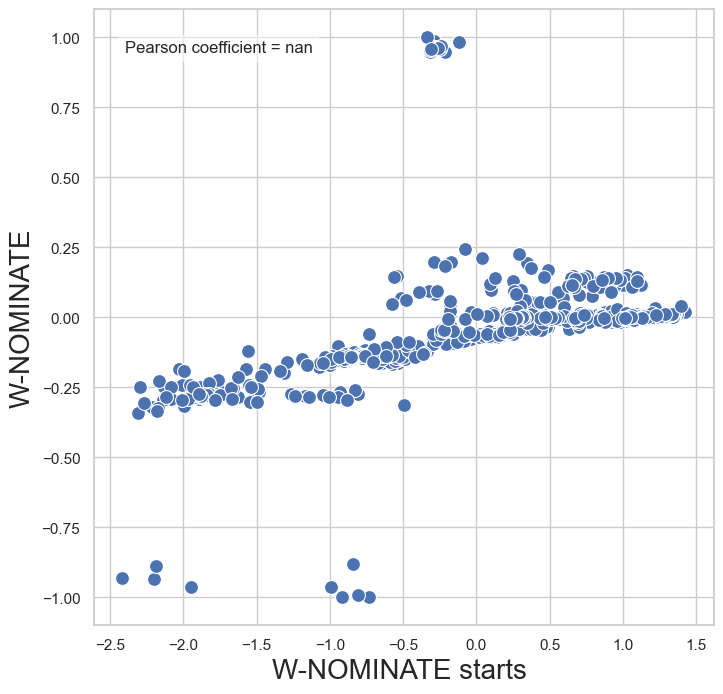

Correlation Coefficient: nan
P-value: nan


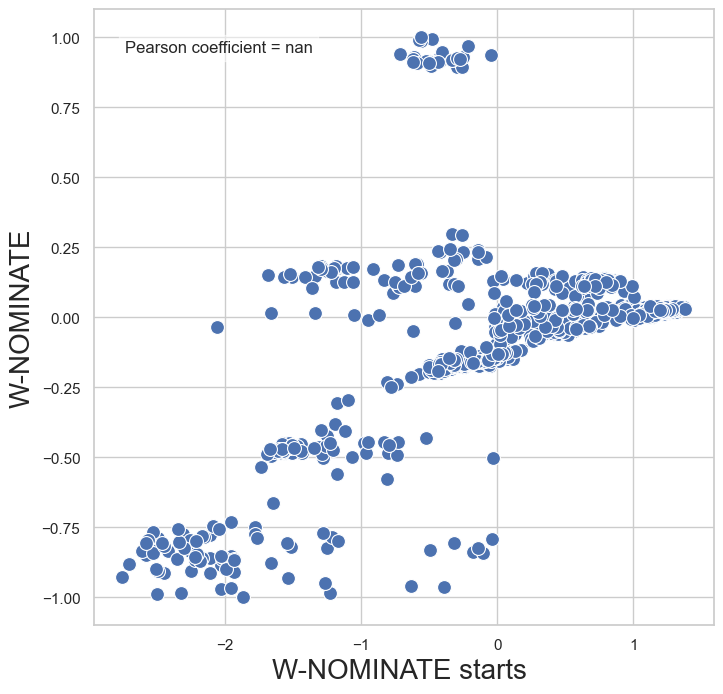

In [78]:
startswnomscatter(wnominate6_1d,wnomstarts6_scaled,6)
startswnomscatter(wnominate7_1d,wnomstarts7_scaled,7)
startswnomscatter(wnominate8_1d,wnomstarts8_scaled,8)